### 3.1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# defining the rosenbrock function and its gradient
def rosenbrock(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_rosenbrock(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])


In [5]:
def gd_rosenbrock(x0, eta, tau=1e-6, max_iter=10000):
    x = x0.copy()
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_rosenbrock(x)
        if np.linalg.norm(grad) < tau:
            break
        x -= eta * grad
        path.append(x.copy())
    return np.array(path), i + 1

def momentum_rosenbrock(x0, eta, beta, tau=1e-6, max_iter=10000):
    x = x0.copy()
    v = np.zeros_like(x)
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_rosenbrock(x)
        if np.linalg.norm(grad) < tau:
            break
        v = beta * v - eta * grad
        x += v
        path.append(x.copy())
    return np.array(path), i + 1

def nag_rosenbrock(x0, eta, beta, tau=1e-6, max_iter=10000):
    x = x0.copy()
    v = np.zeros_like(x)
    path = [x.copy()]
    for i in range(max_iter):
        y = x + beta * v
        grad = grad_rosenbrock(y)
        if np.linalg.norm(grad) < tau:
            break
        v = beta * v - eta * grad
        x += v
        path.append(x.copy())
    return np.array(path), i + 1


In [18]:
def plot_trajectories(gd_path, mom_path, nag_path):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = 100 * (Y - X**2)**2 + (1 - X)**2

    plt.figure(figsize=(9, 7))
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap='jet')

    plt.plot(gd_path[:, 0], gd_path[:, 1], 'r-', label='GD')
    plt.plot(mom_path[:, 0], mom_path[:, 1], 'g-', label='Momentum')
    plt.plot(nag_path[:, 0], nag_path[:, 1], 'b-', label='NAG')

    plt.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Trajectories on Rosenbrock Function Contours')
    plt.grid(True)
    plt.show()


GD converged in 10000 iterations
Momentum GD converged in 3119 iterations
NAG converged in 3020 iterations


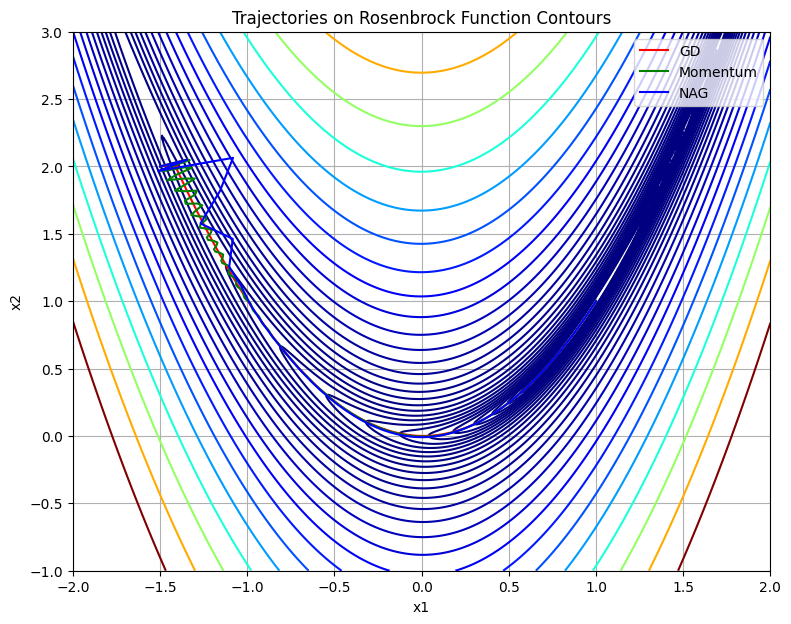

In [19]:
x0 = np.array([-1.5, 2.0])
eta = 0.001
beta = 0.9

gd_path, gd_iter = gd_rosenbrock(x0, eta)
mom_path, mom_iter = momentum_rosenbrock(x0, eta, beta)
nag_path, nag_iter = nag_rosenbrock(x0, eta, beta)

print(f"GD converged in {gd_iter} iterations")
print(f"Momentum GD converged in {mom_iter} iterations")
print(f"NAG converged in {nag_iter} iterations")

plot_trajectories(gd_path, mom_path, nag_path)


- **GD (Red line)**: The GD trajectory follows a more zig-zagging path, especially in the narrow valley. This suggests that GD is struggling to move efficiently towards the minimum. The lack of smoothing results in the oscillatory nature of the path.
- **Momentum GD (Green line)**: The Momentum GD trajectory shows a smoother and faster path towards the minimum. It avoids some of the oscillations of GD,
β=0.9), which helps in accelerating the descent along consistent gradient directions.
- **NAG (Blue line):** The NAG trajectory is the fastest and most efficient. NAG's lookahead mechanism, which predicts the next position before computing the gradient, results in a smoother and more direct path to the minimum. It converges faster and more accurately than both GD and Momentum.

### 3.2

<ipython-input-4-be2b0a81a382>:7: RuntimeWarning: overflow encountered in scalar power
  df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
<ipython-input-4-be2b0a81a382>:8: RuntimeWarning: overflow encountered in scalar power
  df_dx2 = 200 * (x2 - x1**2)
<ipython-input-4-be2b0a81a382>:7: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
<ipython-input-4-be2b0a81a382>:8: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx2 = 200 * (x2 - x1**2)
<ipython-input-4-be2b0a81a382>:7: RuntimeWarning: overflow encountered in scalar multiply
  df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
<ipython-input-5-0348232b35d3>:34: RuntimeWarning: invalid value encountered in subtract
  v = beta * v - eta * grad


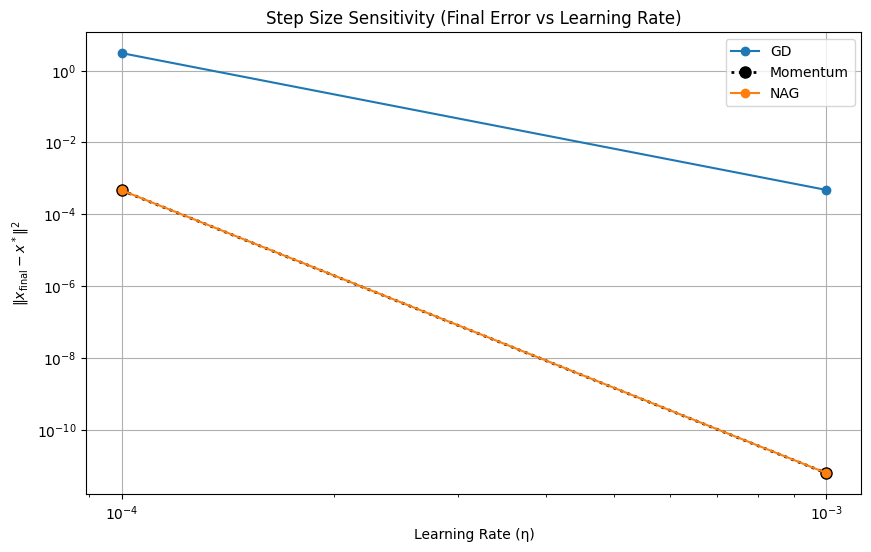

In [17]:
x_star = np.array([1.0, 1.0])
etas = [0.0001, 0.001, 0.01, 0.1]
methods = ['GD', 'Momentum', 'NAG']
final_errors = {method: [] for method in methods}

# Plot final error vs learning rate
plt.figure(figsize=(10, 6))

for eta in etas:
    gd_path, _ = gd_rosenbrock(x0, eta)
    final_errors['GD'].append(np.linalg.norm(gd_path[-1] - x_star)**2)

    mom_path, _ = momentum_rosenbrock(x0, eta, beta)
    final_errors['Momentum'].append(np.linalg.norm(mom_path[-1] - x_star)**2)

    nag_path, _ = nag_rosenbrock(x0, eta, beta)
    final_errors['NAG'].append(np.linalg.norm(nag_path[-1] - x_star)**2)

for method in methods:
    if method == 'Momentum':  # Add condition for Momentum
        plt.plot(etas, final_errors[method], marker='o', linestyle=':', color='black', markersize=8, linewidth=2, label=method)  # Dotted line for Momentum
    else:
        plt.plot(etas, final_errors[method], marker='o', label=method)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Learning Rate (η)')
plt.ylabel(r'$\|x_{\mathrm{final}} - x^*\|^2$')
plt.title('Step Size Sensitivity (Final Error vs Learning Rate)')
plt.legend()
plt.grid(True)
plt.show()


Here the plots for momentum and NAG are overlapping.

Optimal arms are as following
- Gradient descent : 0.01 or 0.05
- Momentum GD : 0.01 or 0.05
- NAG : 0.01 or 0.05

### Tradeoff between convergence and stability

**Gradient descent**

**Smaller step size** :
- A smaller step size, such as 0.0001, results in slow convergence because the algorithm takes very small steps towards the minimum. This means the algorithm needs more iterations to reach the optimal solution.
- However, it ensures stability by preventing overshooting the minimum, making it more reliable for certain types of optimization problems.


**Larger Step Size**
- Larger step sizes (e.g., 0.1) allow the algorithm to converge faster because the updates are larger, and the algorithm takes bigger steps toward the minimum.
- However, if the step size is too large, overshooting occurs, causing instability and potentially leading to divergence, where the algorithm misses the minimum and keeps oscillating.

which implies
- Slow convergence with smaller η is stable, but might take too long to reach the minimum.

- Faster convergence with larger 𝜂 is riskier and can lead to oscillations or divergence if the step size is too large.

**Momentum GD**

- With momentum, the algorithm is less sensitive to the step size because the velocity (momentum) helps to guide the algorithm in the right direction, even with larger step sizes. This improves stability compared to plain GD for larger learning rates.
- However, too large a momentum coefficient (
𝛽
β) might result in overshooting because it will apply too much past gradient information, resulting in instability.

Momentum accelerates convergence without sacrificing much stability. However, too large a
β or step size can lead to instability and overshooting the minimum.

**NAG**

- NAG is more stable than Momentum because it adjusts the update direction before applying the momentum. This prevents the overshooting that might occur with a large momentum term and offers a more accurate convergence path.
- Even with relatively larger step sizes, NAG can maintain stability and converge faster because it corrects its path more accurately through the lookahead mechanism.

NAG provides fast convergence with high stability. It strikes a better balance than Momentum, as it has both a predictive component (lookahead) and the stabilizing momentum. However, like all methods, too large a learning rate can still cause issues with convergence.